In [31]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#Test Polynomial regression 
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
#import errors
df = pd.read_csv("error_wiki_train.csv")
#drop colunmn
df = df.drop(["Unnamed: 0"], axis=1)
print(df.shape)

(15804, 2)


In [3]:
#Add dummy ethnicities
ethnicity_list = ["white", "black", "asian", "indian", "others"]

df["ethnicity"] = np.random.choice(ethnicity_list, size=len(df))
print(df["ethnicity"].value_counts())
df.head()

black     3237
indian    3179
white     3174
others    3132
asian     3082
Name: ethnicity, dtype: int64


,Actual,Prediction,ethnicity
0,48,35,indian
1,52,52,black
2,39,39,black
3,44,52,white
4,31,41,black


### Test for Asians

In [17]:
mask = df["ethnicity"] == "asian"
df_asian = df[mask]

#X = np.reshape(df_asian["Prediction"],-1, 1)

X = df_asian["Prediction"]
X = X.to_frame()

Y = df_asian["Actual"]
Y = Y.to_frame()

In [18]:
X

,Prediction
11,49
15,29
24,68
28,26
36,49
...,...
15783,27
15786,54
15787,23
15798,50


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 11)

In [20]:
#Poly with 3 degrees
poly = PolynomialFeatures(degree=3)

X_train_P = poly.fit_transform(X_train)
X_test_P = poly.fit_transform(X_test)

reg = linear_model.LinearRegression()
reg.fit(X_train_P, Y_train)

y_pred_x_train_P = reg.predict(X_train_P)
y_pred_x_test_P = reg.predict(X_test_P)



In [21]:
reg.score(X_train_P,Y_train)

0.7928936768070363

In [22]:
reg.score(X_test_P,y_pred_x_test_P)

1.0

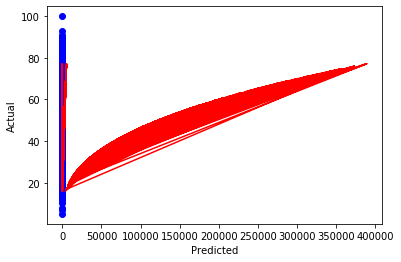

In [29]:
# Visualising the Linear Regression results 
plt.scatter(X, Y, color = 'blue') 
  
plt.plot(X_test_P, y_pred_x_test_P, color = 'red') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
  
plt.show() 

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred_x_train = regressor.predict(X_train)
y_pred_x_test = regressor.predict(X_test)

In [25]:
regressor.score(X_train,Y_train)

0.7918852536812345

In [26]:
regressor.score(X_test,y_pred_x_test)

1.0

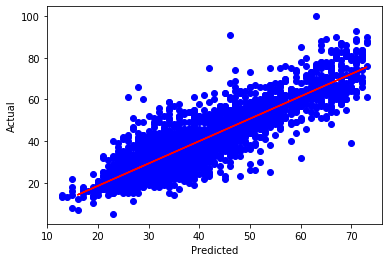

In [28]:
plt.scatter(X, Y, color = 'blue') 
  
plt.plot(X_test, y_pred_x_test, color = 'red') 

plt.xlabel('Predicted') 
plt.ylabel('Actual') 

plt.show() 

In [33]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=50)
RandomForestRegressorModel.fit(X_train, Y_train)
prediction_score = RandomForestRegressorModel.score(X_train, Y_train)
test_score = RandomForestRegressorModel.score(X_test, Y_test)
print(prediction_score,test_score)

0.797272155591972 0.8058148095222198


C:\Users\sebas\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
